In [0]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
df=pd.read_excel("titanic.xls")
df.shape
df.info()

(1309, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [0]:
import pandas_profiling
eda_report_titanic=pandas_profiling.ProfileReport(df)
eda_report_titanic
eda_report_titanic.to_file("eda_report_titanic.html")

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,14
Number of observations,1309
Total Missing (%),21.0%
Total size in memory,143.3 KiB
Average record size in memory,112.1 B
Numeric,6
Categorical,7
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [0]:
df.head()
import statistics
titanic=df
#titanic=df.fillna({'Age':df['age'].median(),'embarked':statistics.mode})

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [0]:
titanic.drop(['name','boat','body','home.dest','ticket','cabin'],axis=1,inplace=True)

In [0]:
titanic.head()
titanic.rename(columns={'sex':'gender','sibsp':'siblings','parch':'parents_child'}, inplace=True)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [0]:
titanic.head()

,pclass,survived,gender,age,siblings,parents_child,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [0]:
titanic[titanic['embarked'].isnull()]

,pclass,survived,gender,age,siblings,parents_child,fare,embarked
168,1,1,female,38.0,0,0,80.0,NaN
284,1,1,female,62.0,0,0,80.0,NaN


In [0]:
titanic['embarked']=titanic['embarked'].fillna(titanic['embarked'].mode()[0])

In [0]:
titanic[titanic['embarked'].isnull()]
#titanic['embarked'].isnull()

,pclass,survived,gender,age,siblings,parents_child,fare,embarked


In [0]:
print(titanic.iloc[284,])

pclass                1
survived              1
gender           female
age                  62
siblings              0
parents_child         0
fare                 80
embarked              S
Name: 284, dtype: object


In [0]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass           1309 non-null int64
survived         1309 non-null int64
gender           1309 non-null object
age              1046 non-null float64
siblings         1309 non-null int64
parents_child    1309 non-null int64
fare             1308 non-null float64
embarked         1309 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [0]:
titanic_pivot=pd.pivot_table(titanic,values='age',index='gender',columns='pclass',aggfunc=np.mean)
titanic_pivot
by_gender_class=titanic.groupby(['gender','pclass'])
type(by_gender_class['age'])

pclass,1,2,3
gender,,,
female,37.037594,27.499191,22.185307
male,41.029250,30.815401,25.962273


pandas.core.groupby.generic.SeriesGroupBy

In [0]:
def impute_median(x):
  return x.fillna(x.median())

In [0]:
titanic.age=by_gender_class['age'].apply(impute_median)
titanic['age'].head()
titanic.info()

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
Name: age, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass           1309 non-null int64
survived         1309 non-null int64
gender           1309 non-null object
age              1309 non-null float64
siblings         1309 non-null int64
parents_child    1309 non-null int64
fare             1308 non-null float64
embarked         1309 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [0]:
titanic.iloc[118,:]
#titanic.iloc[121,:]

pclass               1
survived             0
gender            male
age                 42
siblings             0
parents_child        0
fare             26.55
embarked             S
Name: 118, dtype: object

In [0]:
titanic=titanic.fillna(titanic.median())
titanic['gender'].head()
titanic['gender'].head()
for x in titanic.columns:  
  if titanic[x].dtype=='object':
      titanic[x]=pd.Categorical(titanic[x]).codes
titanic.head()

0    female
1      male
2    female
3      male
4    female
Name: gender, dtype: object

0    female
1      male
2    female
3      male
4    female
Name: gender, dtype: object

,pclass,survived,gender,age,siblings,parents_child,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,1,0,0,2.0000,1,2,151.5500,2
3,1,0,1,30.0000,1,2,151.5500,2
4,1,0,0,25.0000,1,2,151.5500,2


In [0]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass           1309 non-null int64
survived         1309 non-null int64
gender           1309 non-null int8
age              1309 non-null float64
siblings         1309 non-null int64
parents_child    1309 non-null int64
fare             1309 non-null float64
embarked         1309 non-null int8
dtypes: float64(2), int64(4), int8(2)
memory usage: 64.0 KB


In [0]:
#titanic=titanic[:-1]
titanic.info()
x=titanic.drop(['survived'],axis=1)
y=titanic['survived']
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass           1309 non-null int64
survived         1309 non-null int64
gender           1309 non-null int8
age              1309 non-null float64
siblings         1309 non-null int64
parents_child    1309 non-null int64
fare             1309 non-null float64
embarked         1309 non-null int8
dtypes: float64(2), int64(4), int8(2)
memory usage: 64.0 KB


0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [0]:
x.head()

,pclass,gender,age,siblings,parents_child,fare,embarked
0,1,0,29.0000,0,0,211.3375,2
1,1,1,0.9167,1,2,151.5500,2
2,1,0,2.0000,1,2,151.5500,2
3,1,1,30.0000,1,2,151.5500,2
4,1,0,25.0000,1,2,151.5500,2


In [0]:
#we will also split our data into train and test datasets and Build the model on train dataset and apply the model on test datset.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
train_x1,test_x1,train_y1,test_y1=train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)
mytree1=DecisionTreeClassifier()
mytree1.fit(train_x1,train_y1)
predicted1=mytree1.predict(test_x1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
print("precision/recall Metrics")
print(metrics.classification_report(test_y1,predicted1))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       203
           1       0.69      0.69      0.69       125

    accuracy                           0.77       328
   macro avg       0.75      0.75      0.75       328
weighted avg       0.76      0.77      0.77       328



In [0]:
#we will also split our data into train and test datasets and Build the model on train dataset and apply the model on test datset.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
train_x2,test_x2,train_y2,test_y2=train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)
mytree2=DecisionTreeClassifier(max_depth=3,min_samples_split=100,class_weight='balanced',min_samples_leaf=50)
mytree2.fit(train_x2,train_y2)
predicted2=mytree2.predict(test_x2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
print("precision/recall Metrics")
print(metrics.classification_report(test_y2,predicted2))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       203
           1       0.71      0.77      0.74       125

    accuracy                           0.79       328
   macro avg       0.78      0.79      0.78       328
weighted avg       0.79      0.79      0.79       328



In [0]:
#we will also split our data into train and test datasets and Build the model on train dataset and apply the model on test datset.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)
mytreeone=DecisionTreeClassifier(max_depth=3)
mytreeone.fit(train_x,train_y)
predicted=mytreeone.predict(test_x)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
train_y.groupby(train_y).size()

survived
0    606
1    375
Name: survived, dtype: int64

In [0]:
print("precision/recall Metrics")
print(metrics.classification_report(test_y,predicted))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       203
           1       0.80      0.75      0.77       125

    accuracy                           0.83       328
   macro avg       0.82      0.82      0.82       328
weighted avg       0.83      0.83      0.83       328



In [0]:
#ACCUIRACY SCORE
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,predicted))

ACCUIRACY SCORE
0.8323170731707317


In [0]:
test_x.columns

Index(['pclass', 'gender', 'age', 'siblings', 'parents_child', 'fare',
       'embarked'],
      dtype='object')

In [0]:
np.round(mytreeone.feature_importances_,2)

array([0.18, 0.63, 0.06, 0.07, 0.  , 0.06, 0.  ])

In [0]:
#visualize the decision tree graph
import graphviz
with open('tree.dot','w') as dotfile:
  tree.export_graphviz(mytreeone,out_file=dotfile,feature_names=x.columns,filled=True)
  dotfile.close()

In [0]:
from graphviz import Source
with open('tree.dot','r') as f:
  text=f.read()
  plot=Source(text)

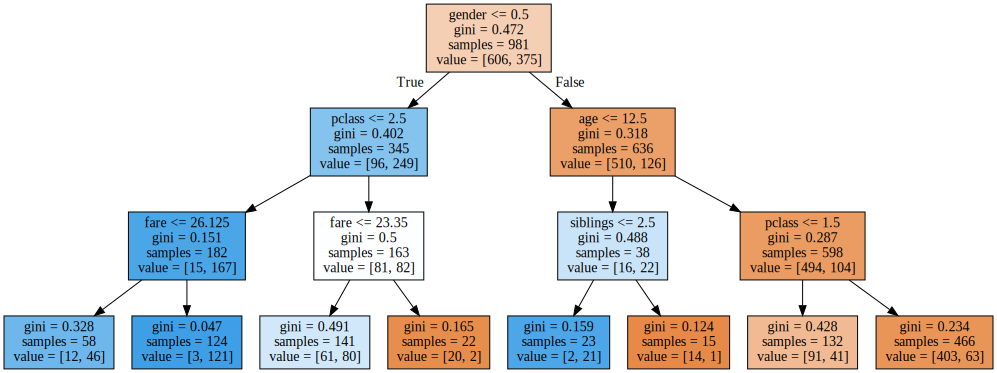

In [0]:
plot

In [0]:
plot.render("plot.png")

'plot.png.pdf'

In [0]:
test_x.columns
np.round(mytreeone.feature_importances_,2)

Index(['pclass', 'gender', 'age', 'siblings', 'parents_child', 'fare',
       'embarked'],
      dtype='object')

array([0.18, 0.63, 0.06, 0.07, 0.  , 0.06, 0.  ])